Análisis exploratorio de los datos

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import nltk
nltk.download('punkt')




[nltk_data] Downloading package punkt to
[nltk_data]     /Users/macbookair/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [21]:
df = pd.read_excel('./Datos_transformados.xlsx')
df.head(3)

,budget,id,overview,popularity,poster_path,release_date,revenue,runtime,status,tagline,...,vote_average,vote_count,collection,language,genre,company,release_year,return,actors,director
0,30000000,862,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,1995-10-30,373554033,81.0,Released,NaN,...,7.7,5415,Toy Story Collection,English,Animation,Pixar Animation Studios,1995,12.451801,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...",John Lasseter
1,30000000,862,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,1995-10-30,373554033,81.0,Released,NaN,...,7.7,5415,Toy Story Collection,English,Comedy,Pixar Animation Studios,1995,12.451801,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...",John Lasseter
2,30000000,862,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,1995-10-30,373554033,81.0,Released,NaN,...,7.7,5415,Toy Story Collection,English,Family,Pixar Animation Studios,1995,12.451801,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...",John Lasseter


In [22]:
df.shape

(120793, 21)

In [23]:
df.columns

Index(['budget', 'id', 'overview', 'popularity', 'poster_path', 'release_date',
       'revenue', 'runtime', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'collection', 'language', 'genre', 'company',
       'release_year', 'return', 'actors', 'director'],
      dtype='object')

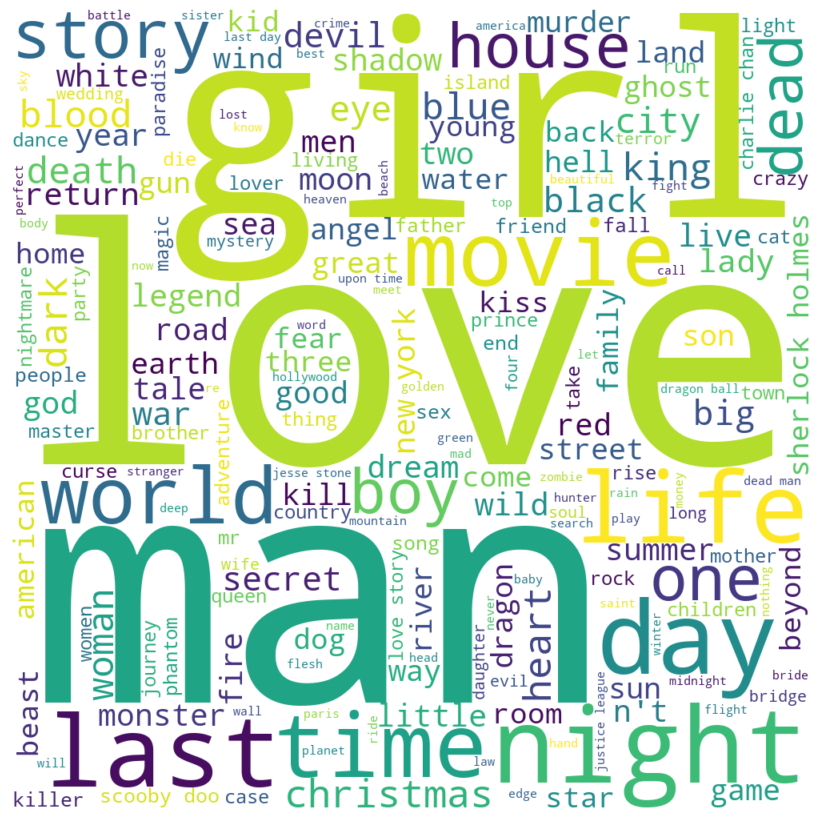

In [28]:
# Asegúrate de tener los datos en un DataFrame 'df'
# df = pd.read_csv('tu_archivo.csv') # Por ejemplo, si tus datos están en un archivo CSV

# Descargar los datos necesarios para tokenización si no están ya descargados


# Convertir la columna en una lista
lista = df['title'].to_list()

# Unir la lista en un solo string
text = ' '.join(lista)

# Tokenizar el texto
token = word_tokenize(text)

# Filtrar las palabras
tokenlist = [word.lower() for word in token if len(word) >= 3]

# Unir las palabras filtradas en un solo string
text = ' '.join(tokenlist)

# Generar la nube de palabras
wordcloud = WordCloud(width=1000, height=1000, background_color="white", min_font_size=8).generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

/var/folders/6m/ttlbw90j17dbjwwktghwcq4c0000gn/T/ipykernel_78476/2916634251.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


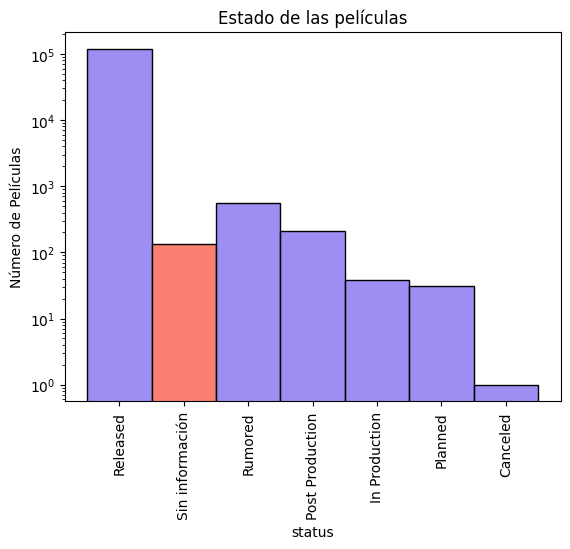

In [ ]:
estado = df['status']
df['status'].fillna('Sin información', inplace = True)
ax = sns.histplot(data = estado, color = 'mediumslateblue')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.patches[1].set_facecolor('salmon')
plt.yscale('log')
plt.ylabel('Número de Películas')
plt.title('Estado de las películas')
plt.show()

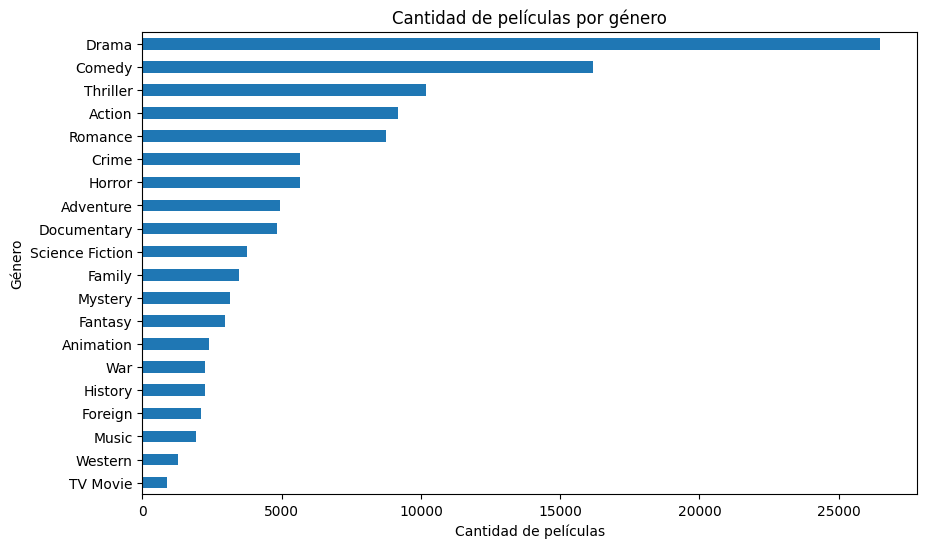

In [ ]:
# Conteo de películas por género
conteo_generos = df['genre'].value_counts()

# Ordenamos los géneros por cantidad de películas
conteo_generos = conteo_generos.sort_values()

# Configuración del gráfico
plt.figure(figsize=(10, 6)) 
conteo_generos.plot(kind='barh')  # Creamos un gráfico de barras horizontales
plt.title('Cantidad de películas por género')  # Añadimos un título al gráfico
plt.xlabel('Cantidad de películas')  # Añadimos un título al eje x
plt.ylabel('Género')  # Añadimos un título al eje y
plt.show()  # Mostramos el gráfico

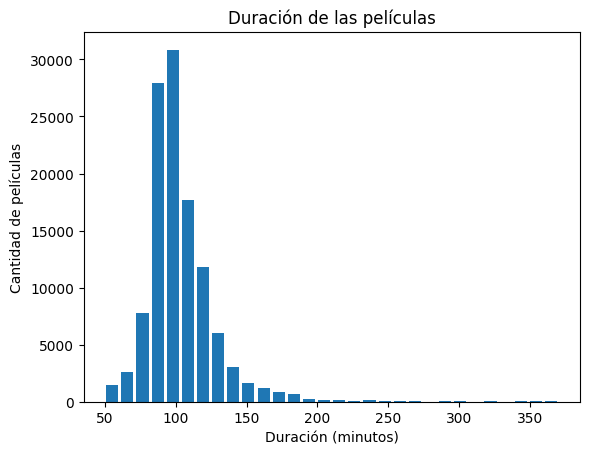

In [ ]:
# Duracion de las peliculas
df_duracion = df[(df['runtime'] >= 50) & (df['runtime'] <= 380)]

df_duracion['runtime'].plot(kind='hist', rwidth=0.8, bins=30)

plt.title('Duración de las películas')
plt.xlabel('Duración (minutos)')
plt.ylabel('Cantidad de películas')

plt.show()

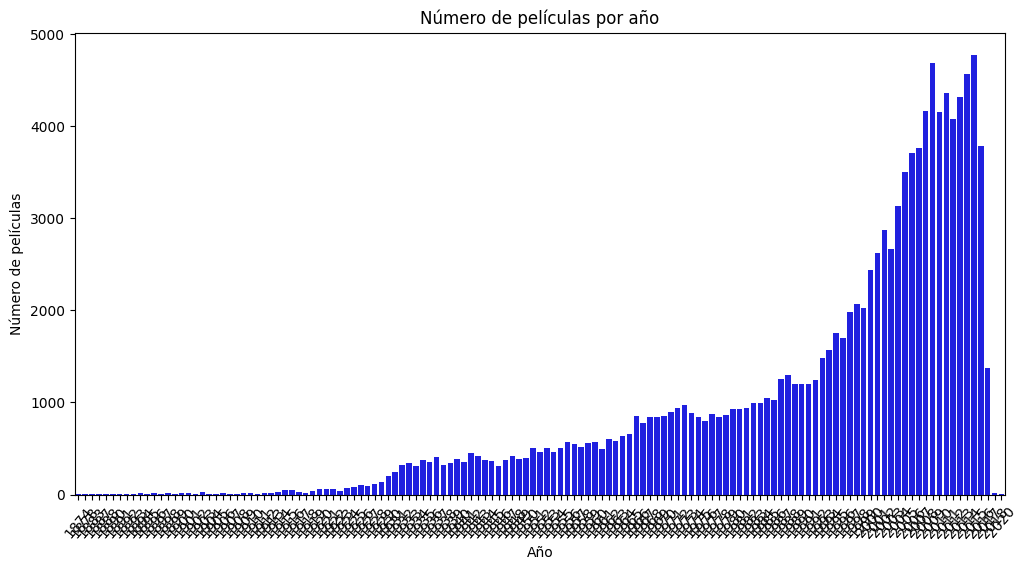

In [ ]:
movies_per_year = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.barplot(x=movies_per_year.index, y=movies_per_year.values, color='b')
plt.xticks(rotation=50)

plt.xlabel('Año')
plt.ylabel('Número de películas')
plt.title('Número de películas por año')

plt.show()

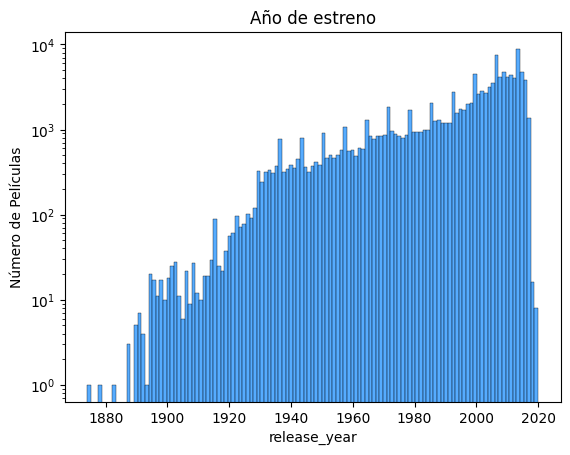

In [ ]:
año = df['release_year']
ax = sns.histplot(data = año, color = 'dodgerblue')
plt.yscale('log')
plt.ylabel('Número de Películas')
plt.title('Año de estreno')
plt.show()

array([[<Axes: title={'center': 'vote_average'}>]], dtype=object)

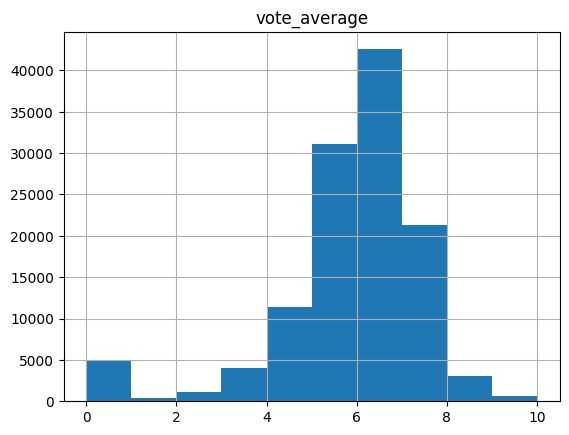

In [ ]:
# Analizamos la distribución de las puntuaciones de la pelicula

df.hist('vote_average')